In [1]:
!pip install keras
!pip install numpy
!pip instll pandas

ERROR: unknown command "instll" - maybe you meant "install"


In [3]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [6]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [7]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


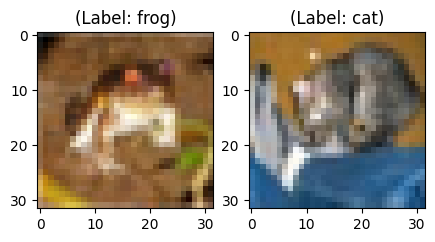

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

Text(0.5, 1.0, '(Label: truck)')
Text(0.5, 1.0, '(Label: ship)')


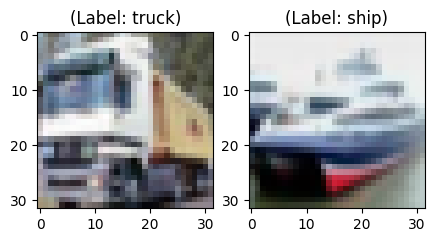

In [14]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[1], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[1][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[1],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[1][0]]) + ")"))

In [15]:
np.min(x_train),np.max(x_train)

(np.uint8(0), np.uint8(255))

In [16]:
x_train = x_train/255.0

In [17]:
np.min(x_train),np.max(x_train)

(np.float64(0.0), np.float64(1.0))

In [18]:
x_train.shape

(50000, 32, 32, 3)

Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

But before that, let's reshape the image dimensions from three to one (flatten the images).

In [19]:
x_train_flat = x_train.reshape(-1,3072)

In [20]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [21]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [22]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


Perfect! The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.

In [23]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


Next, you will create the PCA method and pass the number of components as two and apply fit_transform on the training data, this can take few seconds since there are 50,000 samples

In [25]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

Then you will convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame.

In [26]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [27]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522103,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


Let's quickly find out the amount of information or variance the principal components hold.

In [28]:
print('Explained variability per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variability per principal component: [0.2907663  0.11253144]


Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

Its time to visualize the CIFAR-10 data in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

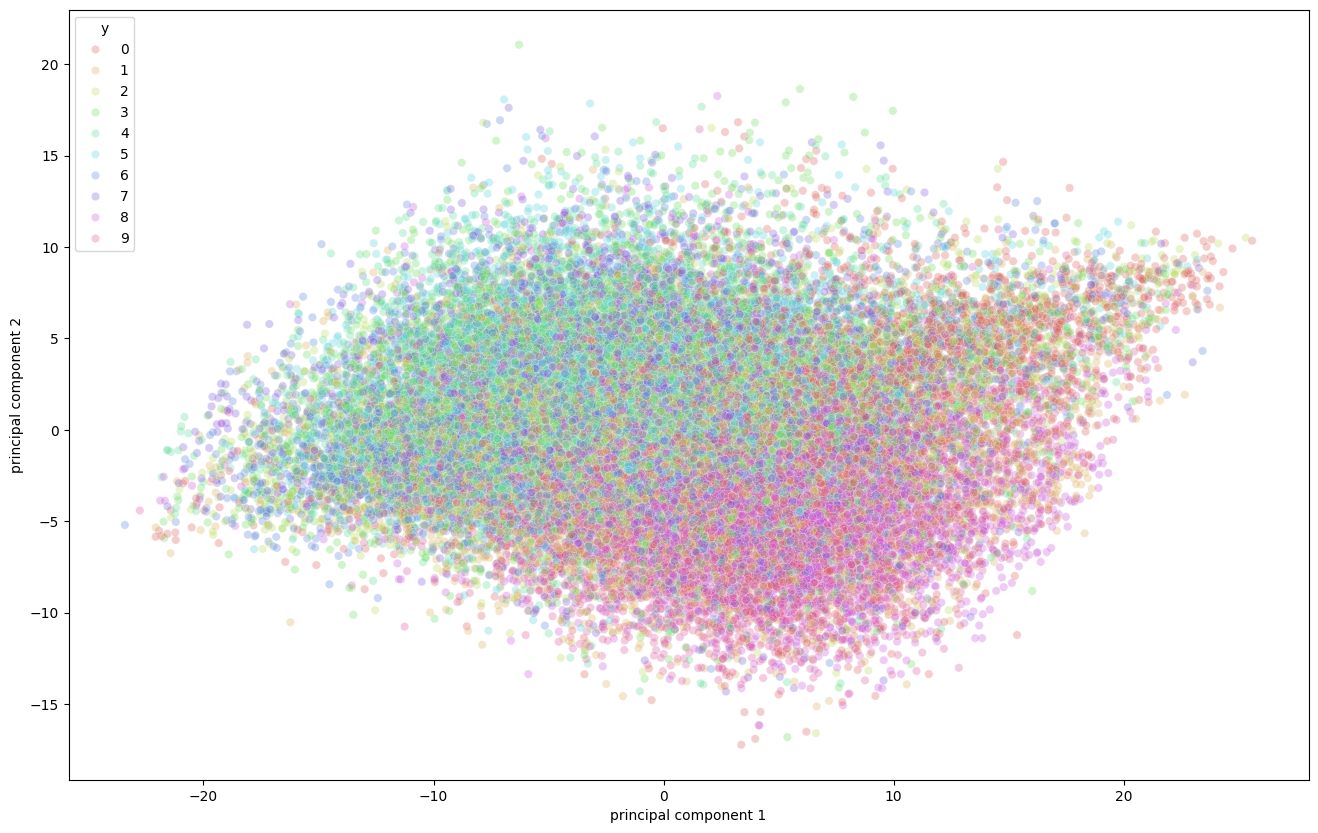

In [29]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.